# cif construction

In [1]:
from pymatgen.core import Structure, Lattice

# 创建金刚石结构的硅晶体
lattice = Lattice.cubic(5.43)  # 硅的晶格常数
structure = Structure(
    lattice,
    ["Si", "Si"],  # 两个硅原子
    [[0, 0, 0], [0.25, 0.25, 0.25]]  # 原子位置
)

# 保存为CIF文件
structure.to(filename="Si_diamond.cif", fmt="cif")
print("已创建示例CIF文件: Si_diamond.cif")

已创建示例CIF文件: Si_diamond.cif


c:\Users\yyxc-one\Desktop\cgcnn_custom\.venv\Lib\site-packages\ase\io\cif.py:410: UserWarning: crystal system 'cubic' is not interpreted for space group Spacegroup(225, setting=1). This may result in wrong setting!
  warnings.warn(


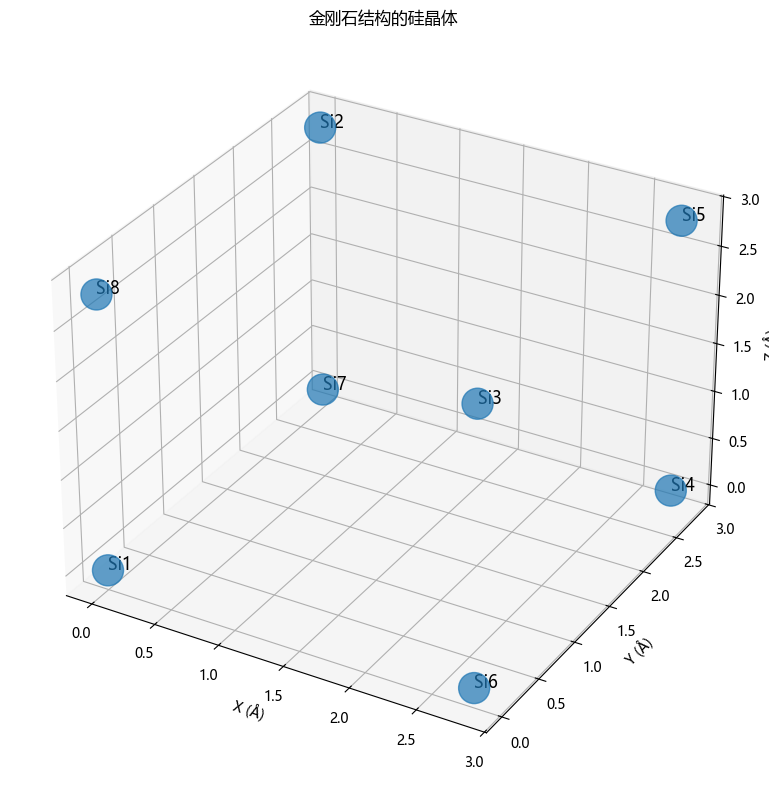

In [64]:
import matplotlib.pyplot as plt
from ase.visualize.plot import plot_atoms
from ase.io import read
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 设置字体为微软雅黑
# 读取CIF文件
atoms = read("1000041.cif")

# 创建3D图
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

# 绘制原子
ax.scatter(
    atoms.positions[:, 0],
    atoms.positions[:, 1],
    atoms.positions[:, 2],
    s=500,
    alpha=0.7
)

# 添加标签
for i, (x, y, z) in enumerate(atoms.positions):
    ax.text(x, y, z, f"Si{i+1}", size=12, zorder=1)

# 设置坐标轴
ax.set_xlabel("X (Å)")
ax.set_ylabel("Y (Å)")
ax.set_zlabel("Z (Å)")
ax.set_title("金刚石结构的硅晶体")

plt.tight_layout()
plt.savefig("crystal_visualization.png")
plt.show()

In [54]:
[sorted(nbrs, key=lambda x: x[1]) for nbrs in all_nbrs ]

[[PeriodicNeighbor: Si1 (Si) (1.358, 1.357, 1.358) [0.25, 0.25, 0.25]],
 [PeriodicNeighbor: Si0 (Si) (0.0, 0.0, 0.0) [0.0, 0.0, 0.0]]]

In [61]:
for nbrs in all_nbrs:
    print(len(nbrs))

1
1


In [63]:
all_nbrs[1][0]

PeriodicNeighbor: Si0 (Si) (0.0, 0.0, 0.0) [0.0, 0.0, 0.0]

In [105]:
all_nbrs=crystal.get_all_neighbors(5, include_index=True)

atom_one_nbr=all_nbrs[0]  #第一个晶原子的近邻原子信息
print(atom_one_nbr)

atom_one_nbr_1=atom_one_nbr[0]

[PeriodicNeighbor: Si1 (Si) (-4.072, 1.357, 1.357) [-0.75, 0.25, 0.25], PeriodicNeighbor: Si1 (Si) (1.357, -4.072, 1.357) [0.25, -0.75, 0.25], PeriodicNeighbor: Si1 (Si) (1.358, 1.357, -4.072) [0.25, 0.25, -0.75], PeriodicNeighbor: Si1 (Si) (1.358, 1.357, 1.358) [0.25, 0.25, 0.25]]


In [118]:
atom_one_nbr_1[2]

np.int64(1)

In [83]:
step=0
for nbrs in all_nbrs:
   # print([sorted(nbrs, key=lambda x: x[1])])
    print(nbrs[1],step)
    print(nbrs)

[ 1.3575 -4.0725  1.3575] Si 0
[PeriodicNeighbor: Si1 (Si) (-4.072, 1.357, 1.357) [-0.75, 0.25, 0.25], PeriodicNeighbor: Si1 (Si) (1.357, -4.072, 1.357) [0.25, -0.75, 0.25], PeriodicNeighbor: Si1 (Si) (1.358, 1.357, -4.072) [0.25, 0.25, -0.75], PeriodicNeighbor: Si1 (Si) (1.358, 1.357, 1.358) [0.25, 0.25, 0.25]]
[0.   0.   5.43] Si 0
[PeriodicNeighbor: Si0 (Si) (0.0, 0.0, 0.0) [0.0, 0.0, 0.0], PeriodicNeighbor: Si0 (Si) (0.0, 0.0, 5.43) [0.0, 0.0, 1.0], PeriodicNeighbor: Si0 (Si) (8.732e-16, 5.43, 3.325e-16) [0.0, 1.0, 0.0], PeriodicNeighbor: Si0 (Si) (5.43, 0.0, 3.325e-16) [1.0, 0.0, 0.0]]


In [18]:
crystal[1].specie.number

14

In [8]:
from pymatgen.core import Structure
import numpy as np

# 加载CIF文件
crystal = Structure.from_file("Si_diamond.cif")

# 设置搜索半径
radius = 3.0  # 埃(Å)

# 获取所有邻居
all_nbrs = crystal.get_all_neighbors(radius, include_index=True)

print(f"晶体中有 {len(crystal)} 个原子")
print(f"每个原子在 {radius} Å 半径内的邻居数:")

for i, nbrs in enumerate(all_nbrs):
    # 按距离排序
    sorted_nbrs = sorted(nbrs, key=lambda x: x[1])
    
    print(f"\n原子 {i} ({crystal[i].species_string}):")
    print(f"位置: {crystal[i].frac_coords}")
    
    # 打印最近的4个邻居
    for j, nbr in enumerate(sorted_nbrs[:4]):
        site, distance, image, idx = nbr  # 修改解包方式
        print(f"  邻居 {j+1}: 原子 {idx} ({site.species_string}), "
              f"距离: {distance:.3f} Å, "
              f"位置: {site.frac_coords}, "
              f"图像: {image}")
    
    # 计算最近邻距离
    min_distance = min(nbr[1] for nbr in sorted_nbrs) if sorted_nbrs else 0
    print(f"最近邻距离: {min_distance:.3f} Å")

晶体中有 2 个原子
每个原子在 3.0 Å 半径内的邻居数:

原子 0 (Si):
位置: [0. 0. 0.]
  邻居 1: 原子 (np.float64(0.0), np.float64(0.0), np.float64(0.0)) (Si), 距离: 2.351 Å, 位置: [0.25 0.25 0.25], 图像: 1
最近邻距离: 2.351 Å

原子 1 (Si):
位置: [0.25 0.25 0.25]
  邻居 1: 原子 (np.float64(0.0), np.float64(0.0), np.float64(0.0)) (Si), 距离: 2.351 Å, 位置: [0. 0. 0.], 图像: 0
最近邻距离: 2.351 Å
